In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
DATA_PATH = 'data/'

In [4]:
time_df = pd.read_csv(os.path.join(DATA_PATH, 'data.csv'), header=None)
time_df.columns = ['a_star', 'bnb', 'dijsktra', 'file_name']
time_df.head()

,a_star,bnb,dijsktra,file_name
0,8.217664,17.710804,18.965972,maze_1/maze_0.csv
1,14.859945,15.849272,21.341148,maze_1/maze_1.csv
2,14.801290,20.250503,17.036702,maze_1/maze_2.csv
3,16.570169,18.979078,21.118979,maze_1/maze_3.csv
4,10.112258,9.787547,17.648709,maze_1/maze_4.csv


In [5]:
data = time_df[['a_star', 'bnb', 'file_name']]
data.head()

,a_star,bnb,file_name
0,8.217664,17.710804,maze_1/maze_0.csv
1,14.859945,15.849272,maze_1/maze_1.csv
2,14.801290,20.250503,maze_1/maze_2.csv
3,16.570169,18.979078,maze_1/maze_3.csv
4,10.112258,9.787547,maze_1/maze_4.csv


In [9]:
label = data[['a_star', 'bnb']].apply(np.argmin, axis=1)

In [13]:
y = label.values

In [15]:
label.value_counts()

0    327
1    172
Name: count, dtype: int64

In [16]:
file_name = data['file_name'].values
file_name[:5]

array(['maze_1/maze_0.csv', 'maze_1/maze_1.csv', 'maze_1/maze_2.csv',
       'maze_1/maze_3.csv', 'maze_1/maze_4.csv'], dtype=object)

In [32]:
img_data = []
for f in file_name:
  val = pd.read_csv(os.path.join(DATA_PATH, f)).values[1:].flatten()
  img_data.append(val)

In [33]:
img_data[0].shape

(1566,)

In [34]:
X = np.array(img_data)
X.shape

(499, 1566)

In [35]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [91]:
X_train.shape, X_test.shape

((449, 1566), (50, 1566))

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=74)

X_train_transform = pca.fit_transform(X_train)
X_test_transform = pca.transform(X_test)

In [142]:
X_train_transform.shape, X_test_transform.shape

((449, 74), (50, 74))

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
clf = LogisticRegression(random_state=0).fit(X_train_transform, y_train)

In [145]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_transform)
accuracy_score(y_test, y_pred)

0.66

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

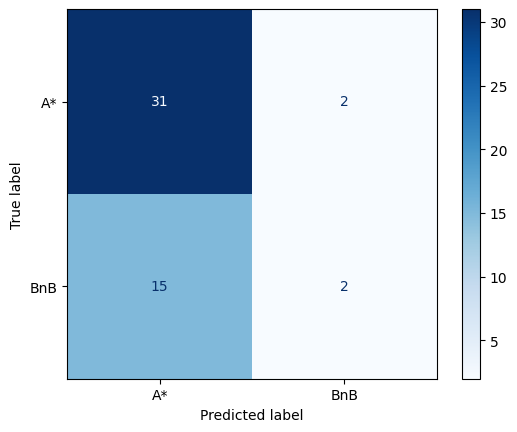

In [147]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test_transform,
        y_test,
        display_labels=['A*', 'BnB'],
        cmap=plt.cm.Blues,
    )
plt.show()

In [148]:
from imblearn.over_sampling import RandomOverSampler

In [149]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [153]:
y_train_over.shape

(588,)

In [154]:
X_train_over.shape

(588, 1566)

In [176]:
pca = PCA(n_components=74)

X_train_transform = pca.fit_transform(X_train_over)
X_test_transform = pca.transform(X_test)

In [177]:
X_train_transform.shape, X_test_transform.shape

((588, 74), (50, 74))

In [178]:
clf = LogisticRegression(random_state=0).fit(X_train_transform, y_train_over)

In [179]:
y_pred = clf.predict(X_test_transform)
accuracy_score(y_test, y_pred)

0.62

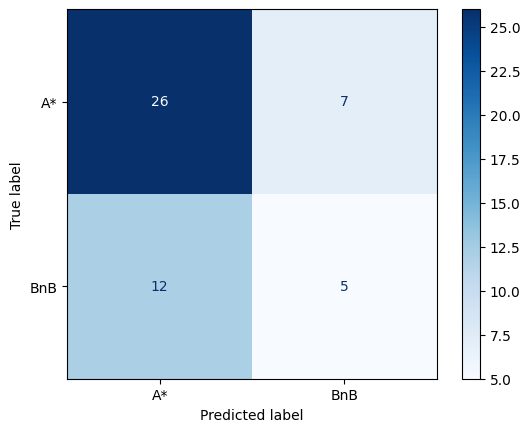

In [180]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test_transform,
        y_test,
        display_labels=['A*', 'BnB'],
        cmap=plt.cm.Blues,
    )
plt.show()